In [1]:
import os
from models_all import *

import time
%matplotlib inline

count 0
index :  500056565 , 100278


/home/rahul/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:3110: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


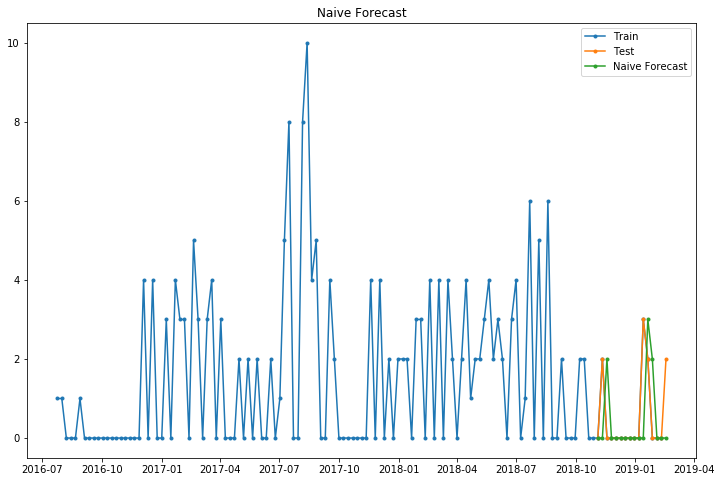

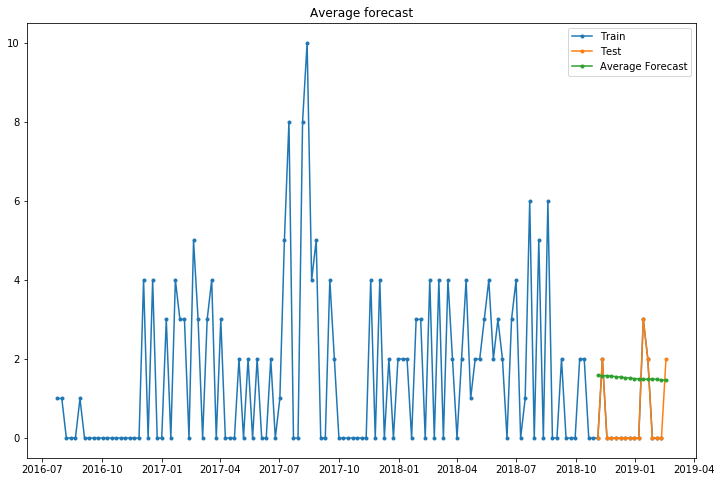

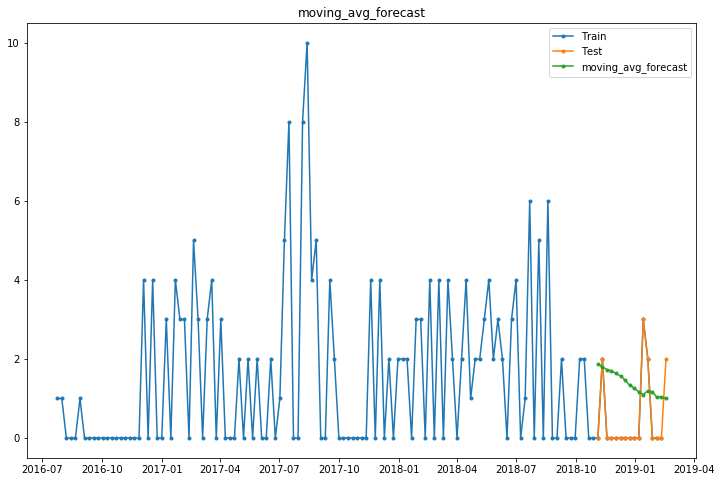

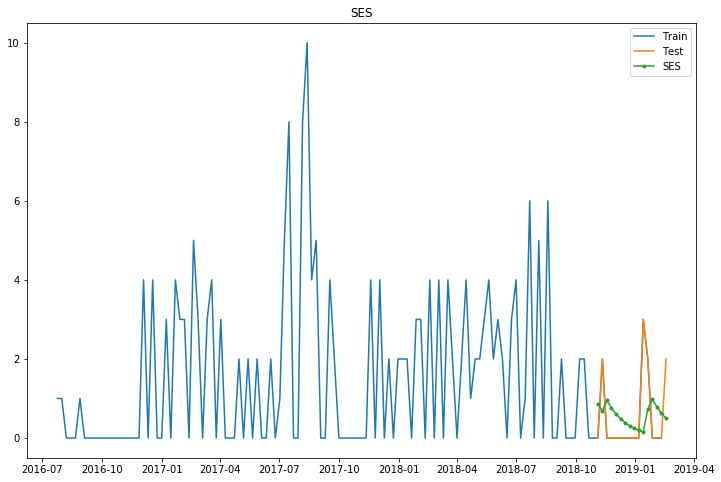

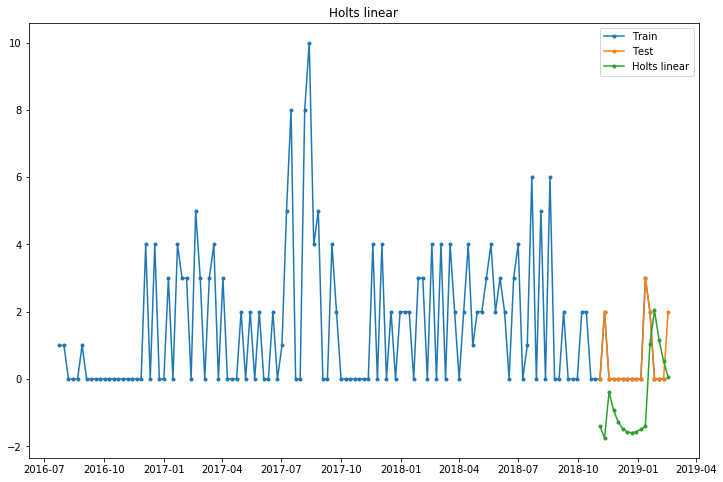

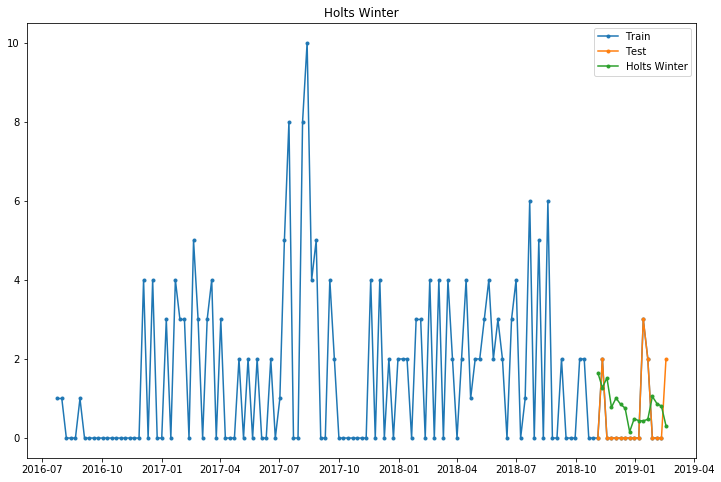

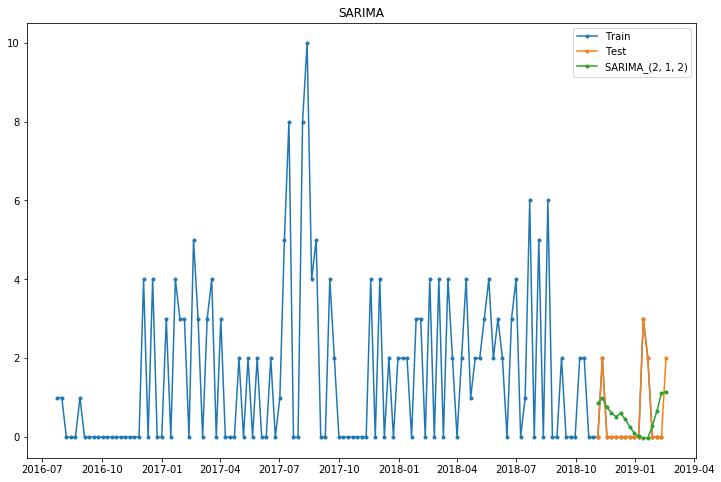

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seaso

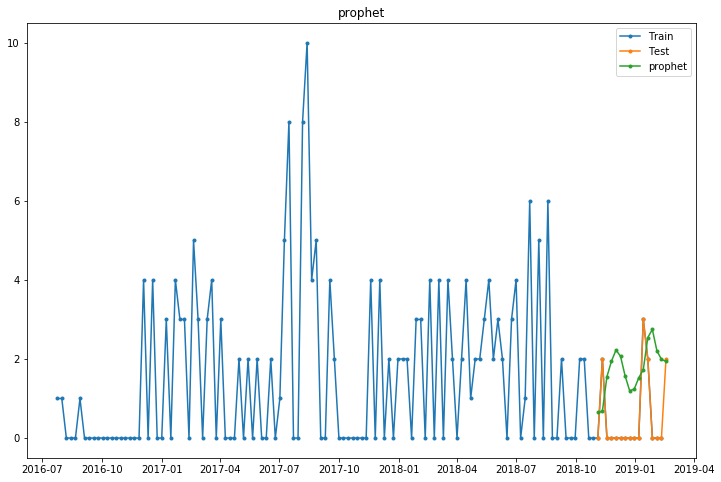

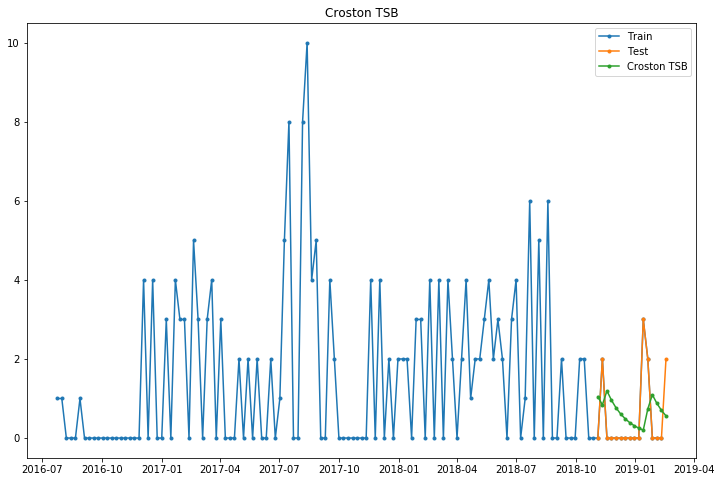

       kunag   matnr  Naive  Average  Moving Average    SES  Holts Linear  \
0  500056565  100278  1.275    1.392           1.373  1.084         1.944   

   Holts Winter  Arima  prophet  croston tsb  
0         1.205  1.101    1.651        1.125  
count 1
index :  500056565 , 116366


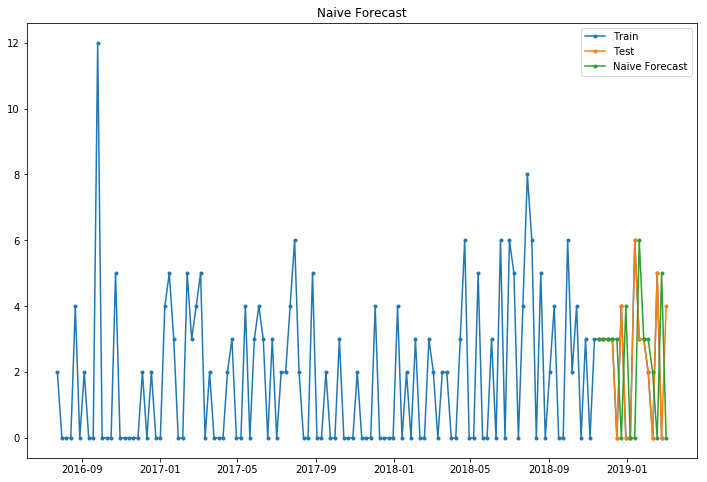

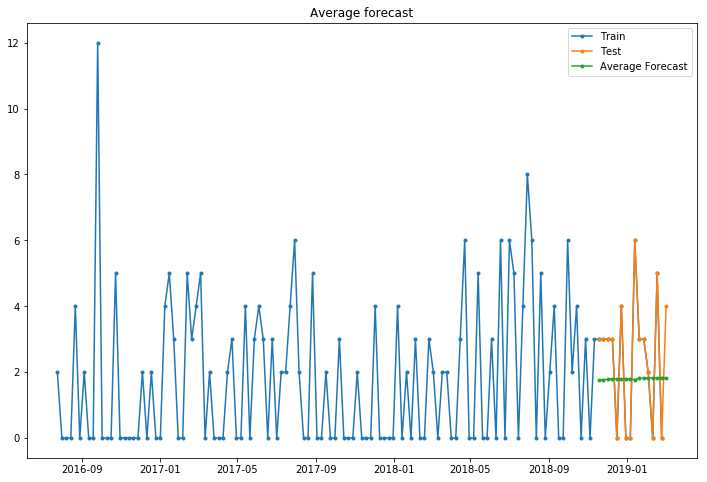

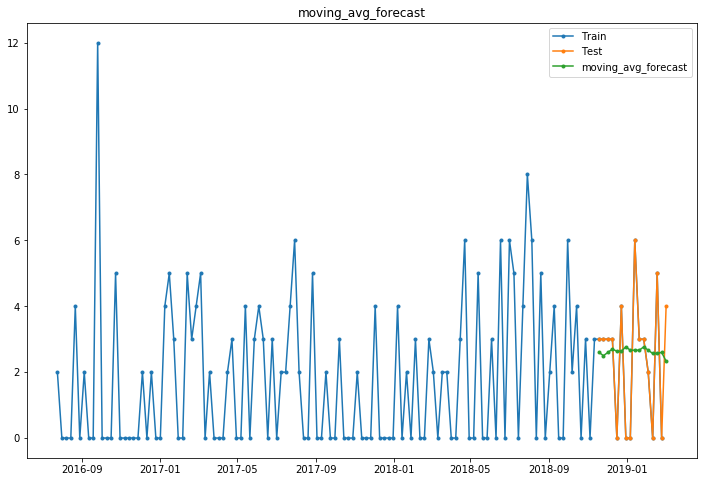

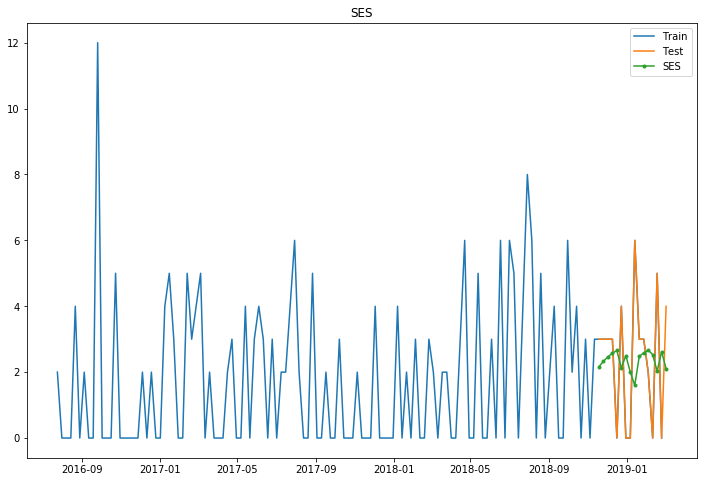

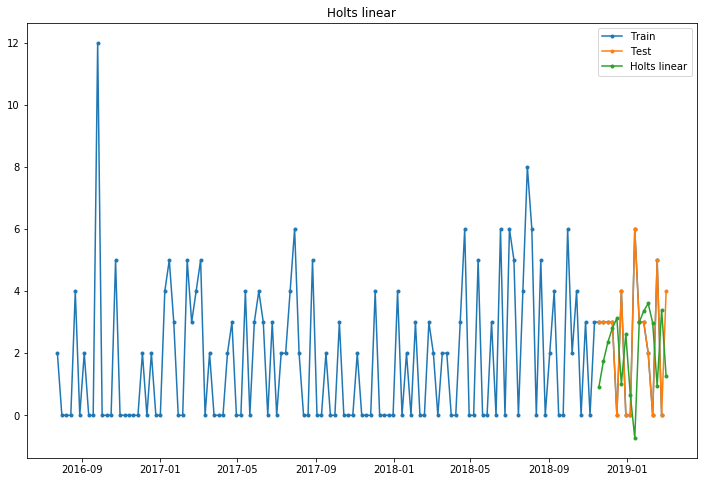

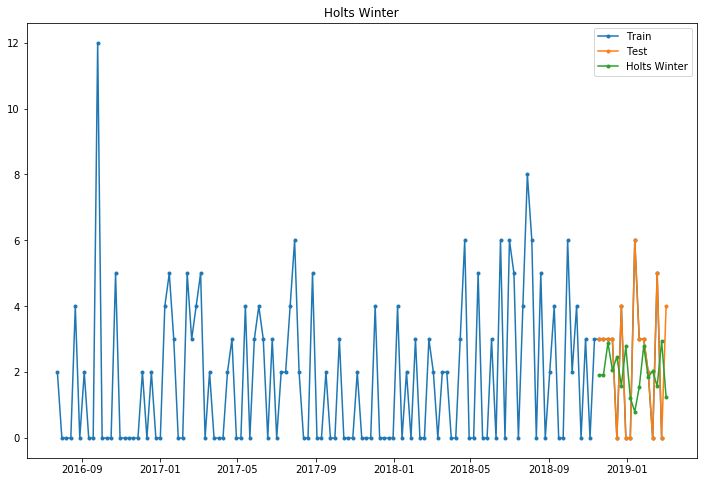

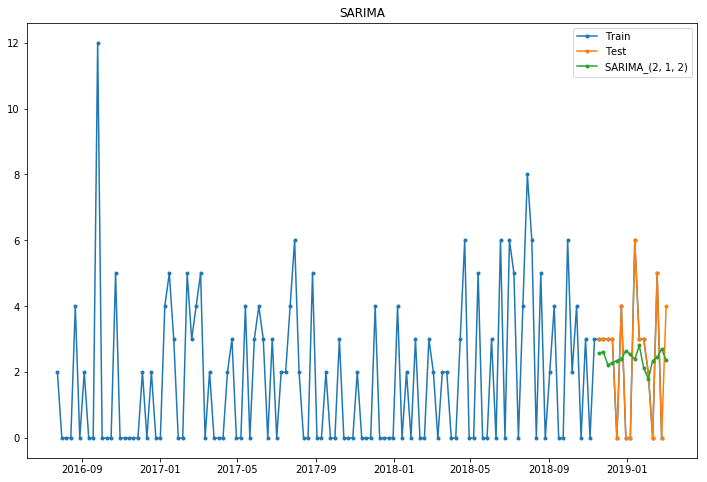

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seaso

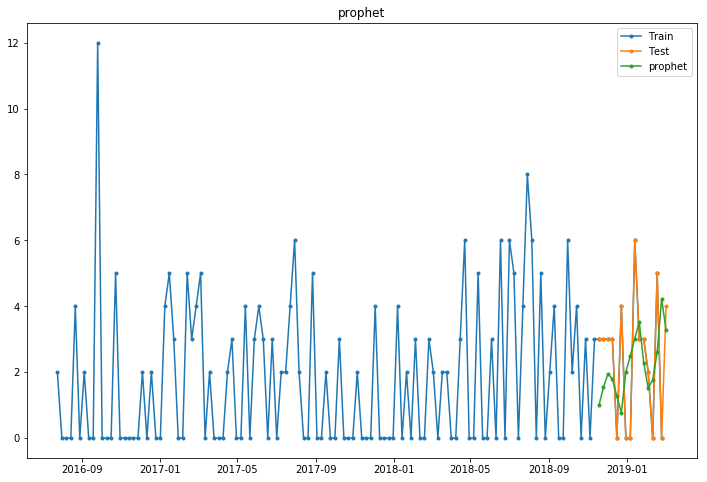

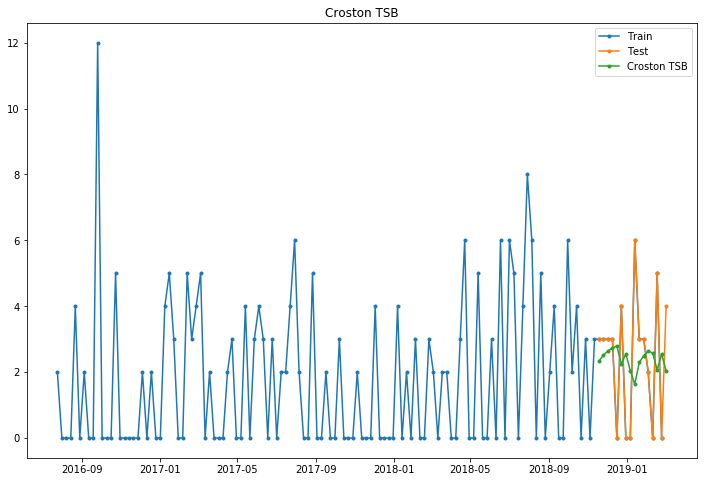

       kunag   matnr  Naive  Average  Moving Average    SES  Holts Linear  \
0  500056565  116366  3.132    1.983           1.904  2.068         2.791   

   Holts Winter  Arima  prophet  croston tsb  
0         2.313   1.92    2.063        2.067  
count 2
index :  500056565 , 117803


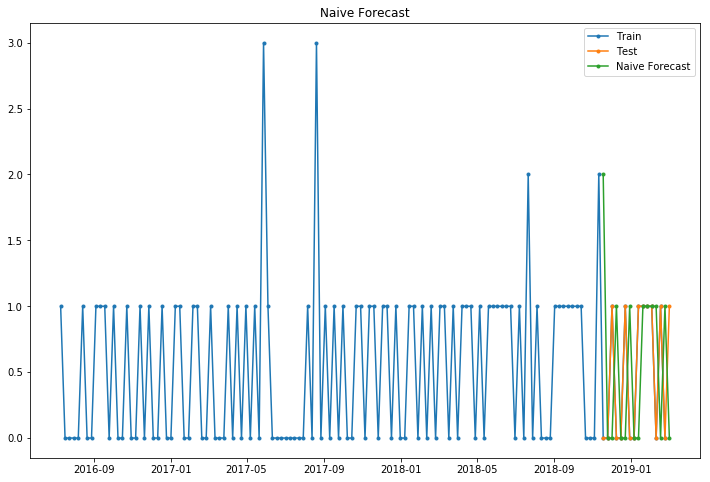

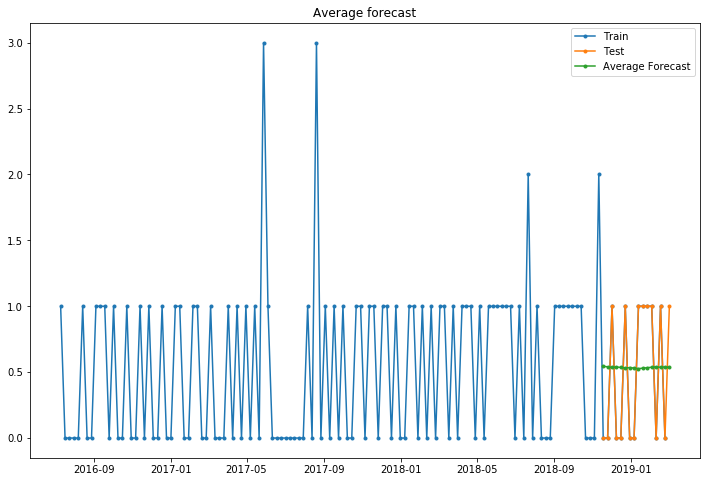

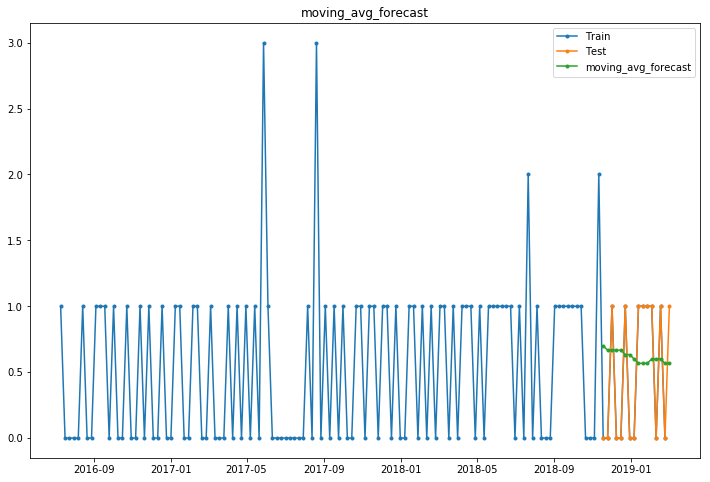

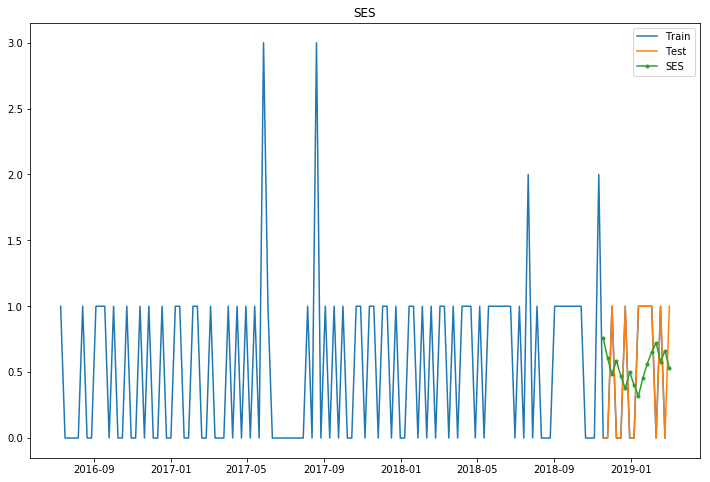

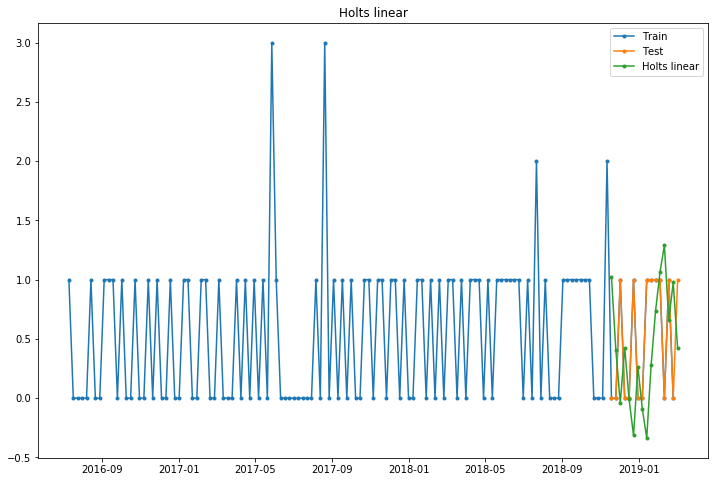

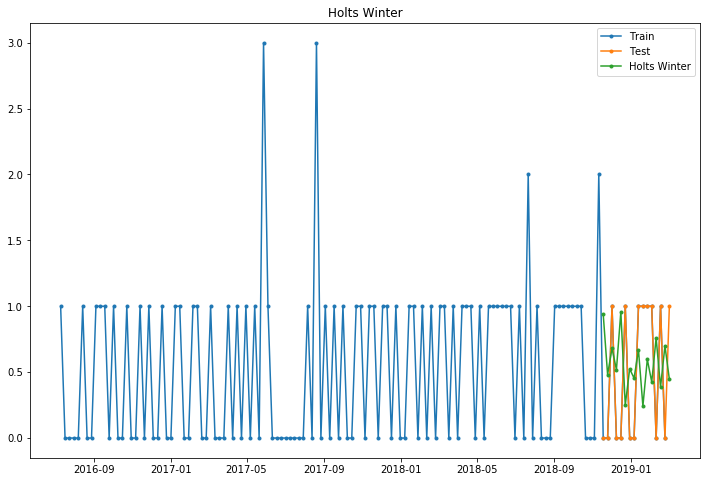

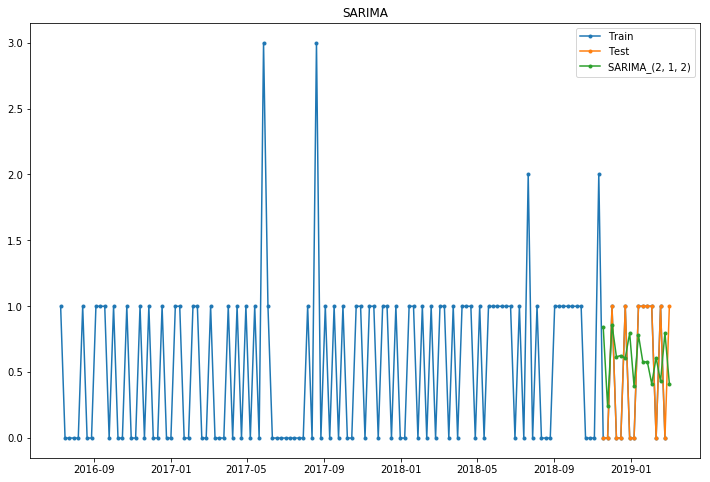

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seaso

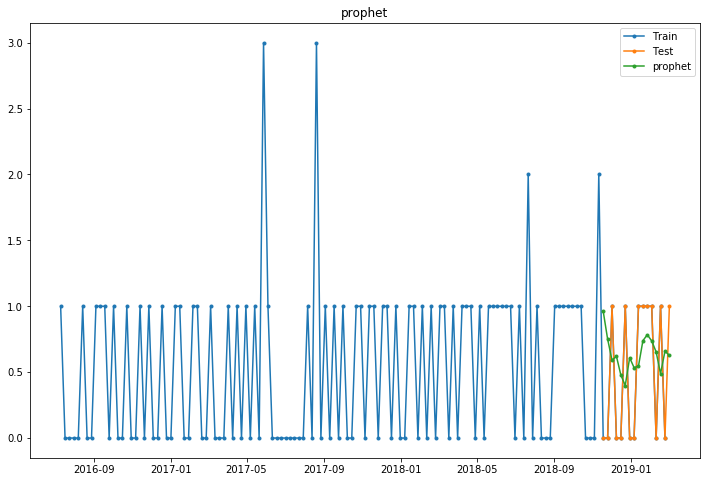

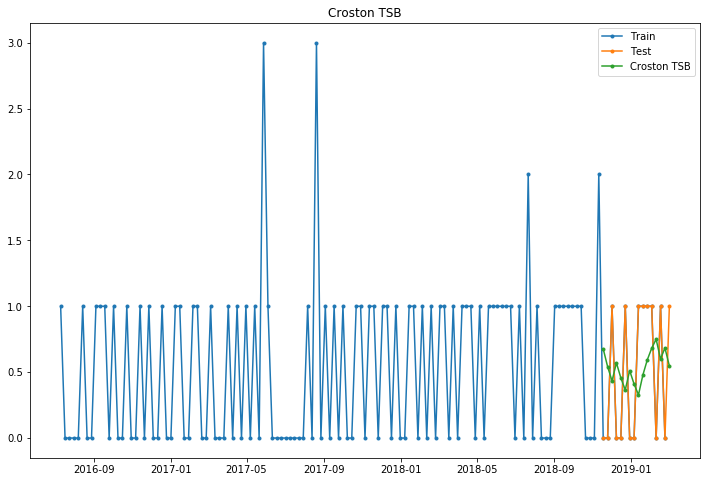

       kunag   matnr  Naive  Average  Moving Average    SES  Holts Linear  \
0  500056565  117803  0.901    0.504           0.535  0.559          0.78   

   Holts Winter  Arima  prophet  croston tsb  
0         0.631  0.556    0.556        0.549  
count 3
index :  500056565 , 119826


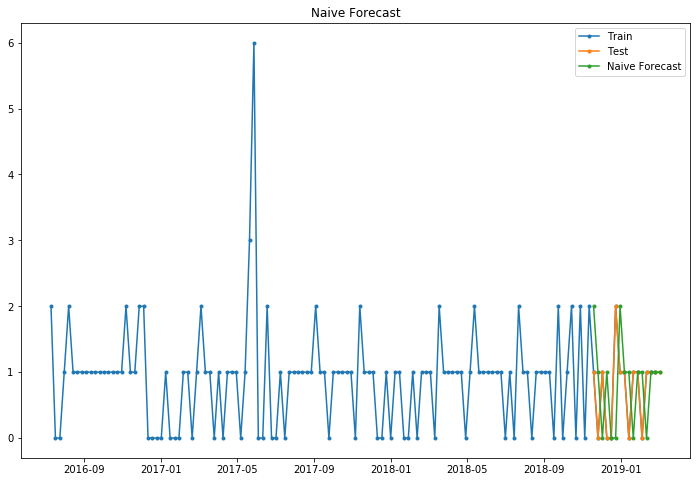

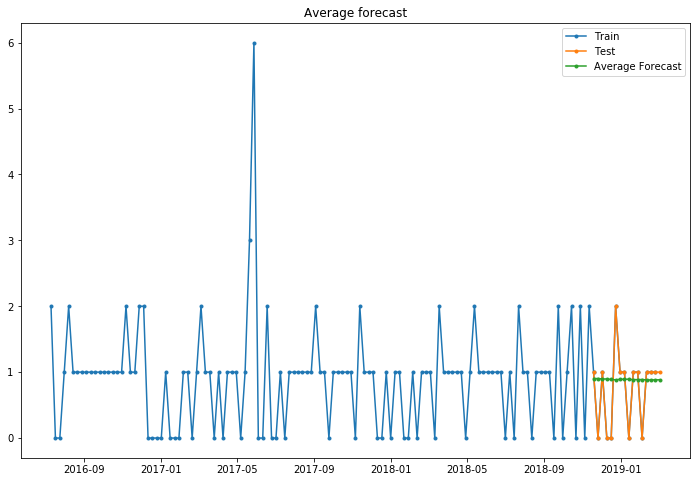

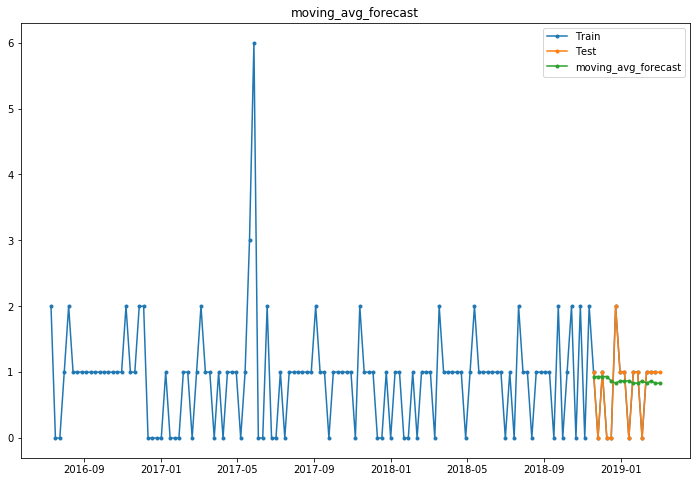

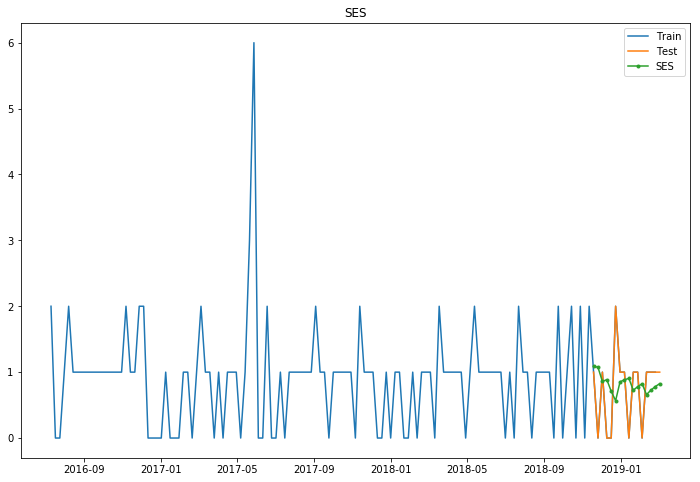

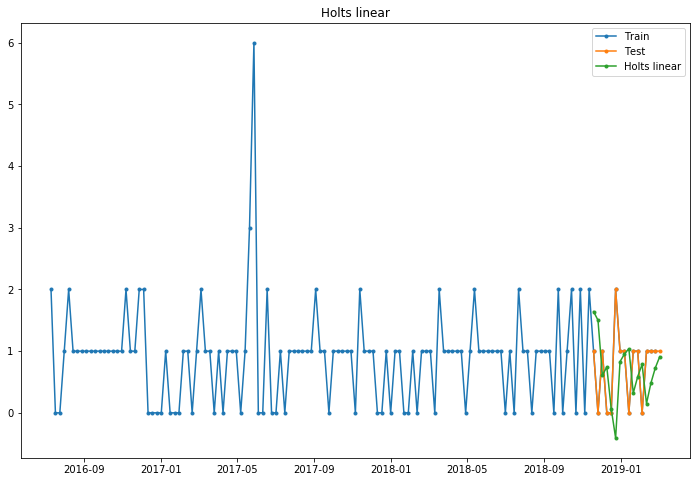

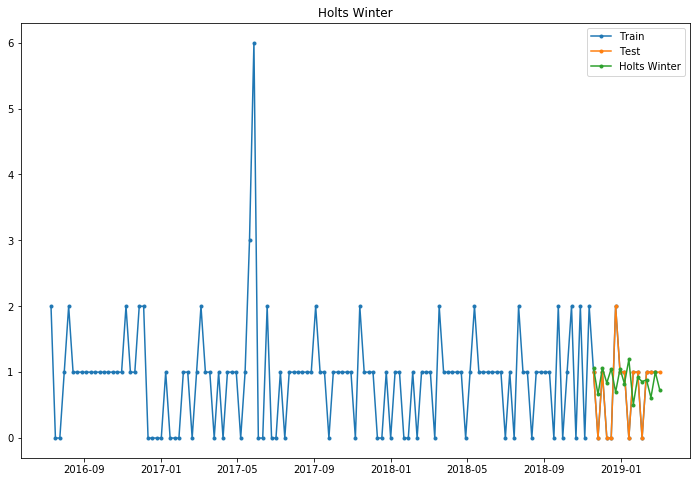

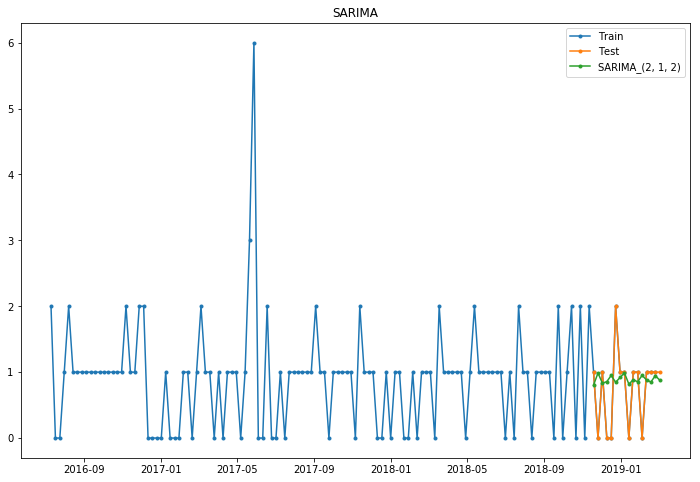

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seaso

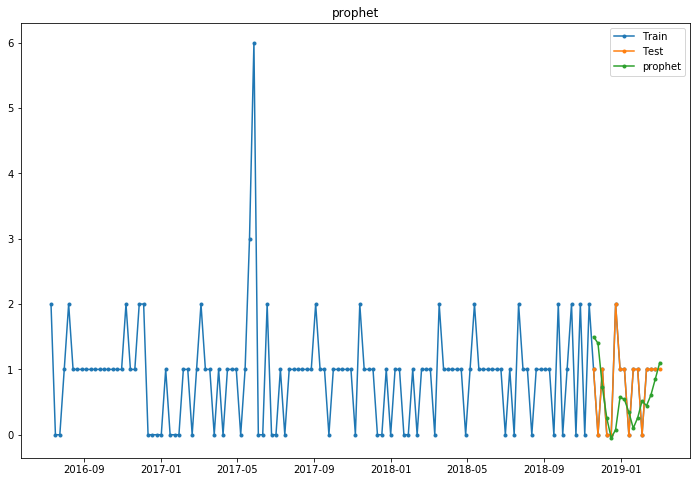

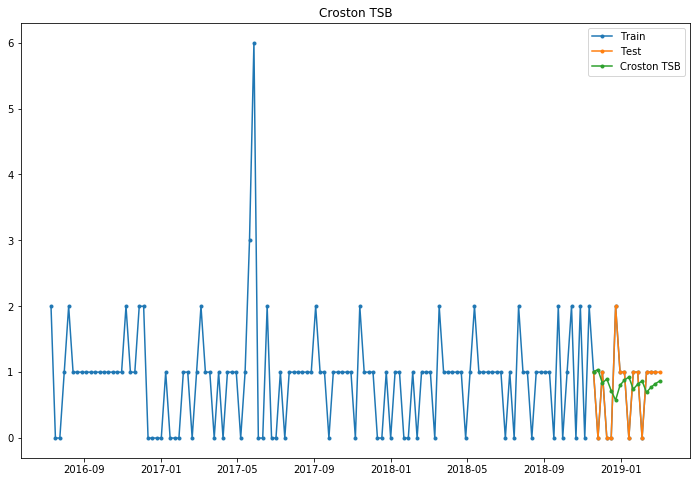

       kunag   matnr  Naive  Average  Moving Average    SES  Holts Linear  \
0  500056565  119826  0.901    0.579           0.589  0.635         0.888   

   Holts Winter  Arima  prophet  croston tsb  
0         0.643  0.596    0.736        0.634  
count 4
index :  500056565 , 132218


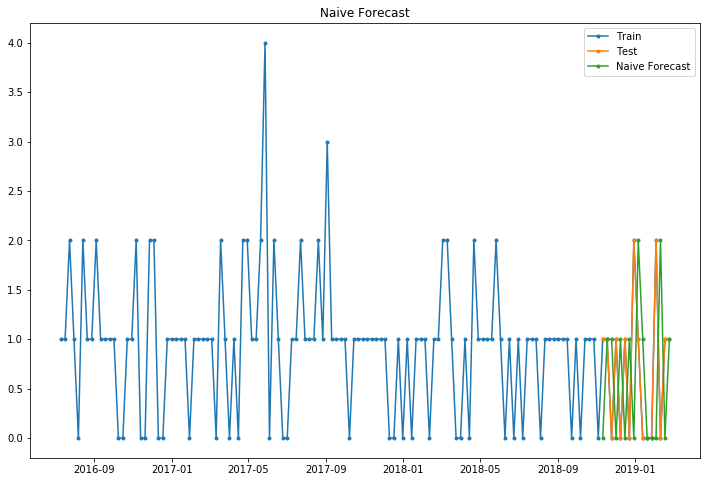

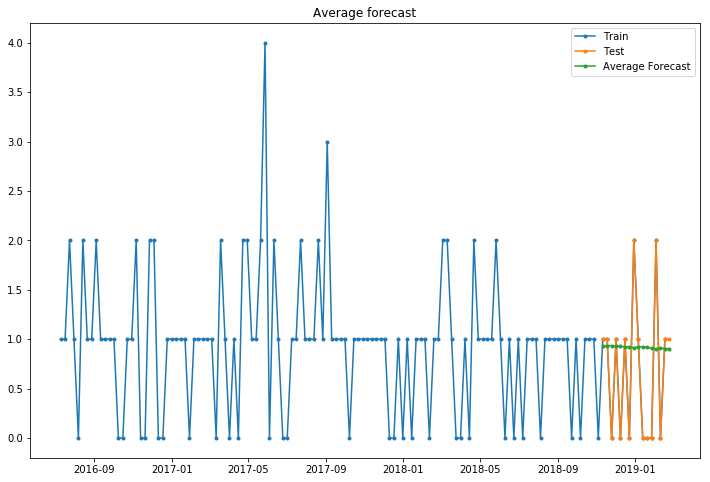

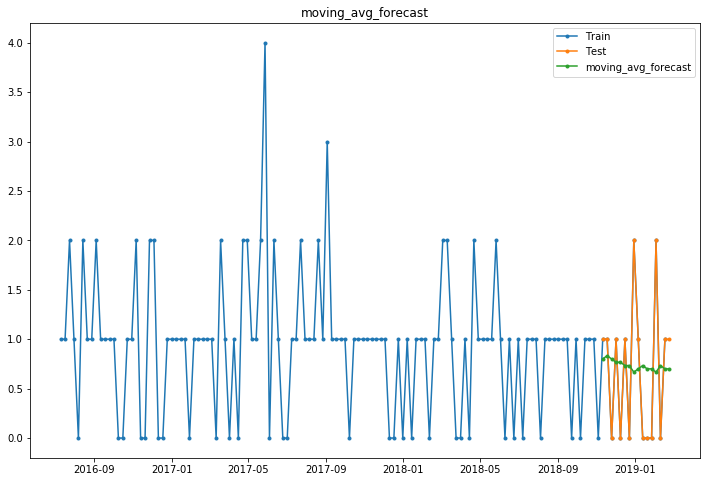

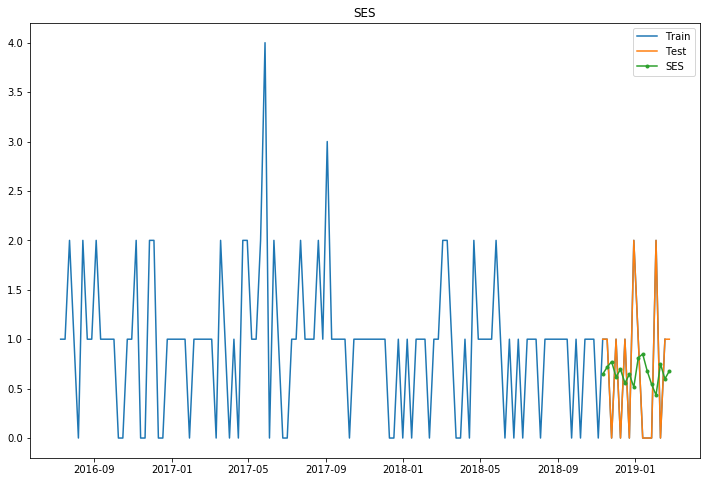

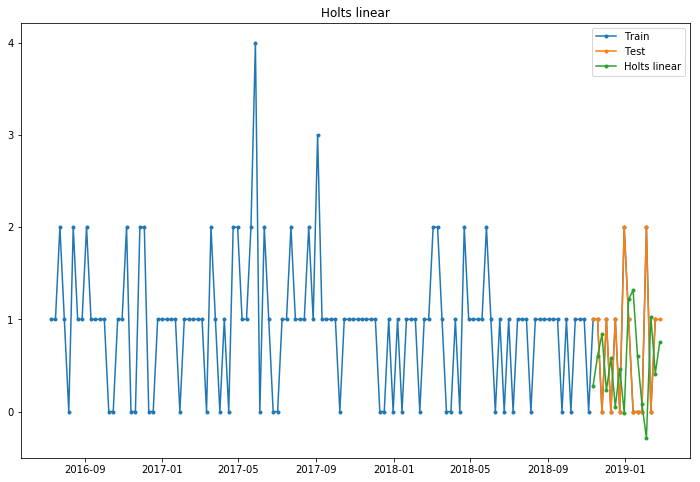

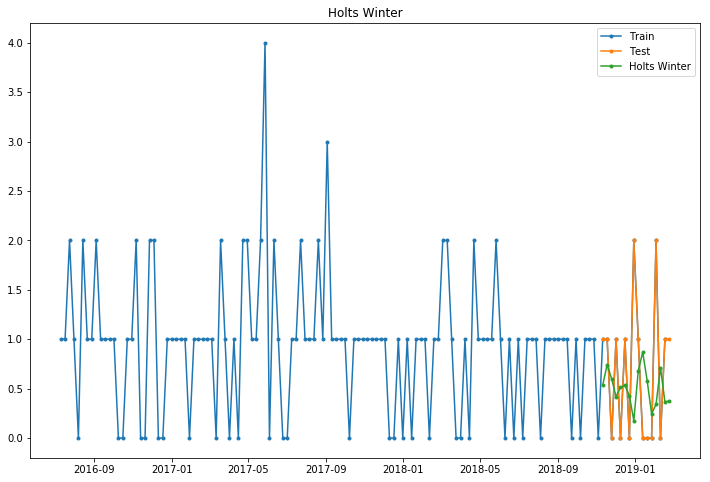

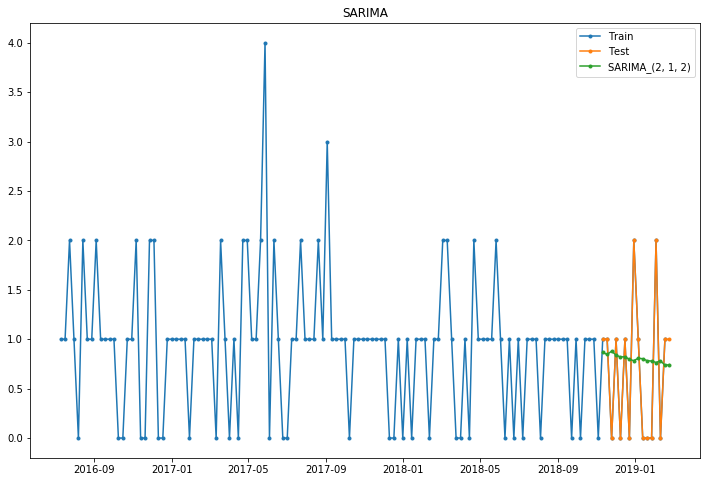

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seaso

SystemError: <built-in method write of _io.BufferedWriter object at 0x7f96c26c70f8> returned a result with an error set

ERROR:root:Invalid alias: The name clear can't be aliased because it is another magic command.
ERROR:root:Invalid alias: The name more can't be aliased because it is another magic command.
ERROR:root:Invalid alias: The name less can't be aliased because it is another magic command.
ERROR:root:Invalid alias: The name man can't be aliased because it is another magic command.


In [ ]:
bucket = pd.read_csv("bucket.csv")
df = pd.read_csv("4200_C005_2019_03_03.tsv", sep=',', header=None)
df.columns = ["kunag", "matnr", "date", "quantity","price"]

main_df = pd.DataFrame(OrderedDict({"kunag" : ["kunag"],"matnr" : ["matnr"],
                       "Naive" : ["-"],
                       "Average" : ["-"],
                       "Moving Average" : ["-"],
                       "SES" : ["-"],
                       "Holts Linear" : ["-"],
                       "Holts Winter" : ["-"],
                       "Arima" : ["-"],
                       "prophet" :["-"],
                       "croston tsb" : ["-"]}))


n = 16               #number of points to predict
rolling = 30         #MOVING AVERAGE FORECAST
sc = 0.2             #SES-SIMPLE EXPONENTIAL SMOOTHING
sl = 0.3
ss = 0.1   #HOLTS LINEAR (sl =smoothong level, ss = smoothing slope)
sp = 4               #HOLTS WINTERS (sp = seasonal period)
p,d,q = 2,1,2        #SARIMA
sps = 0.2            #PROPHET (sps = seasonality prior scale)
alpha,beta = 0.2,0.2 #CROSTON TSB


cnt = 0
for i in range (1,50):
            kunag = int(bucket["kunag"].iloc[i])
            matnr = int(bucket["matnr"].iloc[i])
            print("count",cnt)
            print("index : ",kunag,",",matnr)
            output1,rms1,mae1 = naive(df,kunag,matnr,16)
            output2,rms2,mae2 = average_forecast(df,kunag,matnr,16)
            output3,rms3,mae3 = moving_average(df,kunag,matnr,16,30)
            output4,rms4,mae4 = ses(df,kunag,matnr,16,0.2)
            output5,rms5,mae5 = holts_linear(df,kunag,matnr,16,0.3,0.1)
            output6,rms6,mae6 = holts_winter(df,kunag,matnr,16,4)
            output7,rms7,mae7 = sarima(df,kunag,matnr,16,2,1,2)
            output8,rms8,mae8 = prophet(df, kunag,matnr,16,0.2)
            output9,rms9,mae9 = croston_tsb(df,kunag,matnr,16,0.2,0.2)

            result_df =pd.DataFrame(OrderedDict({"kunag" : [kunag],"matnr" : [matnr],
                   "Naive" : [round(rms1,3)],
                   "Average" : [round(rms2,3)],
                   "Moving Average" : [round(rms3,3)],
                   "SES" : [round(rms4,3)],
                   "Holts Linear" : [round(rms5,3)],
                   "Holts Winter" : [round(rms6,3)],
                   "Arima" : [round(rms7,3)],
                   "prophet" :[round(rms8,3)],
                   "croston tsb" : [round(rms9,3)]}))
            
            print(result_df)
            main_df = main_df.append(result_df, ignore_index = True) 
            cnt+=1
#             if(cnt == 5):                     
#                 break 
print(main_df)


In [ ]:
start = time.time()
bucket = pd.read_csv("bucket.csv")
df = pd.read_csv("4200_C005_2019_03_03.tsv", sep=',', header=None)
df.columns = ["kunag", "matnr", "date", "quantity","price"]

# main_df = pd.DataFrame(OrderedDict({"kunag" : ["kunag"],
#                         "matnr" : ["matnr"],
#                         "window4" : ["-"],
#                        "window8" : ["-"],
#                        "window12" : ["-"],
#                        "window16" : ["-"],
#                        "window20" : ["-"],
#                        "window24" : ["-"],
#                        "window28" : ["-"]}))

m_df = pd.DataFrame({"kunag" : ["kunag"],"matnr" : ["matnr"], "a1" : ["-"]})
cnt = 0
for i in range (1,100):
            kunag = int(bucket["kunag"].iloc[i])
            matnr = int(bucket["matnr"].iloc[i])
            print("count",cnt)
            print("index : ",kunag,",",matnr)
            print("window :", 4)
            output,rms,mae = croston_tsb(df,kunag,matnr,16,0.2,0.2)
#             print("window :", 8)
#             output3,rms3,mae2 = moving_average(df,kunag,matnr,16,8)
#             print("window :", 12)
#             output3,rms3,mae3 = moving_average(df,kunag,matnr,16,12)
#             print("window :", 16)
#             output3,rms3,mae4 = moving_average(df,kunag,matnr,16,16)
#             print("window :", 20)
#             output3,rms3,mae5 = moving_average(df,kunag,matnr,16,20)
#             print("window :", 24)
#             output3,rms3,mae6 = moving_average(df,kunag,matnr,16,24)
#             print("window :", 28)
#             output3,rms3,mae7 = moving_average(df,kunag,matnr,16,25)
#             print("window :", 11)
#             output3,rms3,mae7 = moving_average(df,kunag,matnr,16,11)

#             result_df =pd.DataFrame(OrderedDict({"kunag" : [kunag],
#                     "matnr" : [matnr],
#                     "window4" : [round(mae1,3)],
#                    "window8" : [round(mae2,3)],
#                    "window12" : [round(mae3,3)],
#                    "window16" : [round(mae4,3)],
#                    "window20" : [round(mae5,3)],
#                    "window24" : [round(mae6,3)],
#                    "window28" : [round(mae7,3)]}))
            result_df = pd.DataFrame({"kunag" : [kunag],"matnr" : [matnr], "a1" : [mae]})
            print("MAE : ",mae)
#             print(result_df)
            m_df = m_df.append(result_df, ignore_index = True) 
            cnt+=1
#             if(cnt == 5):                     
#                 break 
# print(main_df)
end = time.time()
print("Time Taken : ",end - start)

In [4]:
m_df = m_df[1:]
m_df.head()

,a1,kunag,matnr
1,0.959641,500056565,100278
2,1.69807,500056565,116366
3,0.535843,500056565,117803
4,0.478755,500056565,119826
5,0.646714,500056565,132218


In [5]:
export_csv = m_df.to_csv (r'results/croston0.2_0.2.csv',sep = ",", index = None, header=True)

In [6]:
data = pd.read_csv("results/croston0.2_0.2.csv",sep = ",", header = None)

In [7]:
data.head()

,0,1,2
0,a1,kunag,matnr
1,0.9596409357441199,500056565,100278
2,1.698068936204982,500056565,116366
3,0.5358433191101993,500056565,117803
4,0.47875518550696433,500056565,119826


In [8]:
data.shape

(100, 3)

In [9]:
data = data.convert_objects(convert_numeric=True)
round(data.sum(axis = 0, skipna = True),3)

/home/rahul/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  """Entry point for launching an IPython kernel.


0    9.999900e+01
1    4.950571e+10
2    1.294956e+07
dtype: float64

In [ ]:
# start = time.time()
# bucket = pd.read_csv("bucket.csv")
# df = pd.read_csv("4200_C005_2019_03_03.tsv", sep=',', header=None)
# df.columns = ["kunag", "matnr", "date", "quantity","price"]

# main_df = pd.DataFrame(OrderedDict({"kunag" : ["kunag"],
#                         "matnr" : ["matnr"],
#                         "window4" : ["-"],
#                        "window8" : ["-"],
#                        "window12" : ["-"],
#                        "window16" : ["-"],
#                        "window20" : ["-"],
#                        "window24" : ["-"],
#                        "window28" : ["-"]}))

# # m_df = pd.DataFrame({"kunag" : ["kunag"],"matnr" : ["matnr"], "a1" : ["-"]})
# cnt = 0
# for i in range (1,50):
#             kunag = int(bucket["kunag"].iloc[i])
#             matnr = int(bucket["matnr"].iloc[i])
#             print("count",cnt)
#             print("index : ",kunag,",",matnr)
#             print("p,q,d :", 0,0,0)
#             output3,rms3,mae1 = sarima(df,kunag,matnr,16,0,0,0)
#             print("p,q,d :", 0,0,1)
#             output3,rms3,mae2 = sarima(df,kunag,matnr,16,0,0,1)
#             print("p,q,d :", 0,1,0)
#             output3,rms3,mae3 = sarima(df,kunag,matnr,16,0,1,0)
#             print("p,q,d :", 1,0,0)
#             output3,rms3,mae4 = sarima(df,kunag,matnr,16,1,0,0)
#             print("p,q,d :", 0,1,1)
#             output3,rms3,mae5 = sarima(df,kunag,matnr,16,0,1,1)
#             print("p,q,d :", 1,0,1)
#             output3,rms3,mae6 = sarima(df,kunag,matnr,16,1,0,1)
#             print("p,q,d :", 1,1,0)
#             output3,rms3,mae7 = sarima(df,kunag,matnr,16,1,1,0)
# #             print("window :", 11)
# #             output3,rms3,mae7 = moving_average(df,kunag,matnr,16,11)

#             result_df =pd.DataFrame(OrderedDict({"kunag" : [kunag],
#                     "matnr" : [matnr],
#                     "window4" : [round(mae1,3)],
#                    "window8" : [round(mae2,3)],
#                    "window12" : [round(mae3,3)],
#                    "window16" : [round(mae4,3)],
#                    "window20" : [round(mae5,3)],
#                    "window24" : [round(mae6,3)],
#                    "window28" : [round(mae7,3)]}))
# #             result_df_df = pd.DataFrame({"kunag" : [kunag],"matnr" : [matnr], "a1" : [mae3]})
#             print(result_df)
#             main_df = main_df.append(result_df, ignore_index = True) 
#             cnt+=1
# #             if(cnt == 5):                     
# #                 break 
# # print(main_df)
# end = time.time()
# print("Time Taken : ",end - start)

In [ ]:
b1 = pd.read_csv("results/arima010.csv")
b1.columns = ['arima010', 'kunag', 'matnr'] 
b1 = b1[['kunag',"matnr","arima010"]]
b2 = pd.read_csv("results/arima100.csv")
b2.columns = ['arima010', 'kunag', 'matnr'] 
b2 = b2[['kunag',"matnr","arima010"]]
del b2['matnr']
del b2['kunag']
b3 = pd.read_csv("results/arima011.csv")
b3.columns = ['arima010', 'kunag', 'matnr'] 
b3 = b3[['kunag',"matnr","arima010"]]
del b3['matnr']
del b3['kunag']
b4 = pd.read_csv("results/arima110.csv")
b4.columns = ['arima010', 'kunag', 'matnr'] 
b4 = b4[['kunag',"matnr","arima010"]]
del b4['matnr']
del b4['kunag']
b5 = pd.read_csv("results/arima021.csv")
b5.columns = ['arima010', 'kunag', 'matnr'] 
b5 = b5[['kunag',"matnr","arima010"]]
del b5['matnr']
del b5['kunag']

In [ ]:
print(b1.head())
print(b2.head())
print(b3.head())
print(b4.head())
print(b5.head())

In [ ]:
df_new = pd.concat([b1, b2, b3, b4, b5],axis =1)

In [ ]:
df_new.head()

In [ ]:
df_new.shape

In [ ]:
export_csv = df_new.to_csv (r'results/all_arima.csv',sep = ",", index = None, header=True)

In [ ]:
pd.read_csv("results/all_arima.csv")